## K Means Clustering: Algorithm to determine clusters/groups among data points.

**Step 1:**<br>
Start with K centroids. Place randomly on scatter plot.

**Step 2:**<br>
Calculate distance of each point from each centroid and cluster them accordingly.

**Step 3:**<br>
Adjust position of the centroids to the 'center of gravity' for given cluster.

**Step 4:**<br>
Re-cluster every point based on their distance from each centroid.

**Step 5:**<br>
Adjust position of the centroids to the center of revised clusters.

**Step 6:**<br>
Recompute clusters and repeat until data points stop changing clusters.

**SSE = Sum of Squared Errors**:<br>
- Take the distance of each data point from it's cluster centroid.
- Square and sum the distance
- Sum the SSE for each cluster

**Plot 'K' vs 'SSE' to help determine best value of K:**
- Use 'elbow' method to select best K value (where slope run > slope rise over distance between points)
- Eventually SSE will reach 0 as K approaches n.

In [19]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


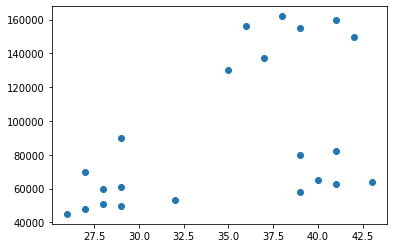

In [2]:
plt.scatter(df.Age, df["Income($)"])

## Cluster data using KMeans (K = 3). Append 'cluster' column to dataframe. Split into three dataframes by cluster and plot the data using colors to denote separate clusters.

In [3]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [5]:
y_predicted = km.fit_predict(df[["Age", "Income($)"]])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [44]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

In [20]:
df["cluster"] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [8]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]

Text(0, 0.5, 'Income ($)')

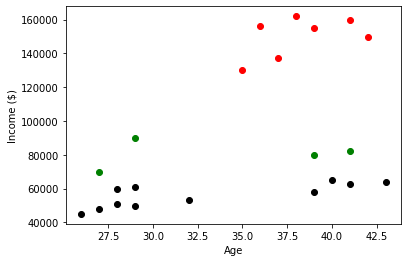

In [12]:
plt.scatter(df0.Age, df0["Income($)"], color="green")
plt.scatter(df1.Age, df1["Income($)"], color="red")
plt.scatter(df2.Age, df2["Income($)"], color="black")

plt.xlabel("Age")
plt.ylabel("Income ($)")

## Use MinMaxScaler so large difference in the scale of x and y-axes don't affect clustering. We had this issue in our plot above. MinMaxScaler functions need double brackets (dataframe).

In [24]:
scaler = MinMaxScaler()
scaler.fit(df[["Income($)"]])
df["Income($)"] = scaler.transform(df[["Income($)"]])

In [32]:
scaler.fit(df[["Age"]])
df.Age = scaler.transform(df[["Age"]])

In [41]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


## Perform clustering (can be done in one line of code). Plot results. Note improved clustering accuracy after implementing feature scaling.

In [42]:
df["cluster"] = KMeans(n_clusters=3).fit_predict(df[["Age", "Income($)"]])

Text(0, 0.5, 'Income ($)')

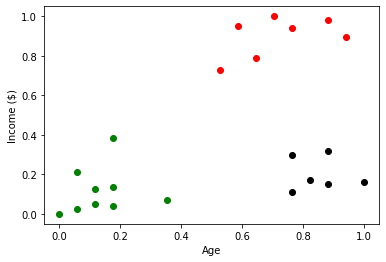

In [43]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]

plt.scatter(df0.Age, df0["Income($)"], color="green")
plt.scatter(df1.Age, df1["Income($)"], color="red")
plt.scatter(df2.Age, df2["Income($)"], color="black")

plt.xlabel("Age")
plt.ylabel("Income ($)")

## Computing and plotting SSE. Use 'elbow' method to choose best value for K.

In [45]:
k_range = range(1,11)
sse = []

for k in k_range:
    sse.append(KMeans(n_clusters = k).fit(df[["Age", "Income($)"]]).inertia_)

In [46]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.27687406216004695,
 0.23047208837899558,
 0.17355596555312644,
 0.13943875937229083,
 0.10188787724979426,
 0.08510915216361348]

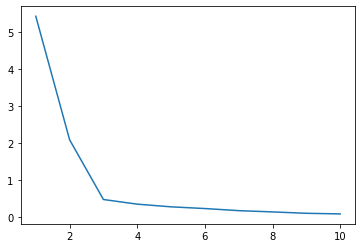

In [47]:
plt.plot(k_range, sse)